## remove background of an image
- [discussion article](https://lowweilin.wordpress.com/2014/08/07/image-background-and-shadow-removal/)
- [supporting code](https://github.com/LowWeiLin/OpenCV_ImageBackgroundRemoval)

### algorithms
Based on the discussion article, the algorithm is able to remove background that is relatively empty, and has a certain amount of contrast versus the subject. The algo is summarized as following steps:

- 1 Remove shadows by converting to HSV and setting V to a fixed value (so it basically deals with color images only)
- 2 Convert to grayscale and normalize
- 3 Apply gaussian blur and Canny edge detector
- 4 Dilate to close gaps
- 5 Flood fill the image from borders
- 6 Erode to account for previous dilation
- 7 Find largest contour
- 8 Mask original image

### Notes: 
the algorithm from the article discussed above is not quite shadow removal as all the pixels with shadow is gone in the image. So it is more like a foreground segmentation (by using hsv to filter out shadows first). As also suggested by the article, more advanced shadow removal algorithm can be found, e.g., [1](http://www.cs.cmu.edu/~efros/courses/LBMV09/Papers/finlayson-eccv-04.pdf), [2](http://infoscience.epfl.ch/record/111781/files/piecewise_shadows.pdf), [3](http://infoscience.epfl.ch/record/111878/files/Hamil_path_Final.pdf)

In [1]:
%matplotlib inline

In [73]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature, morphology, measure, segmentation
import numpy as np

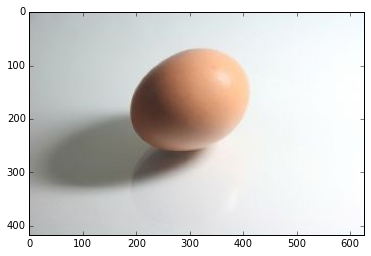

In [18]:
img_url= "https://image.freepik.com/free-photo/egg-with-shadow_2913718.jpg"
egg = io.imread(img_url)
plt.imshow(egg)

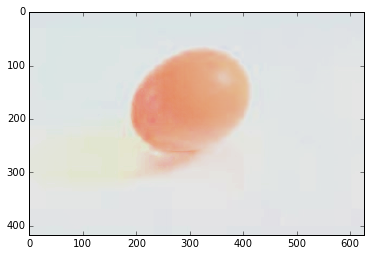

In [70]:
## remove shadow by rgb->hsv, fix v -> revert to rgb
## as the author said, hs defines the "color", and v is
## more related to "brightness"
hsv_egg = color.rgb2hsv(egg)
hsv_egg[:,:,-1] = .9
shadow_free = color.hsv2rgb(hsv_egg)
plt.imshow(shadow_free)

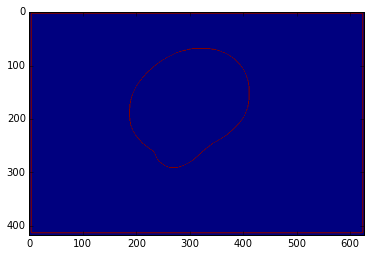

In [84]:
## everything else is standard, 
gray = color.rgb2grey(shadow_free)
## use a big median filter to remove details 
## e.g., irregularity of egg edge    
gray = filters.rank.percentile(gray, morphology.disk(25), p0=.5)
binary = gray > filters.threshold_otsu(gray)
edges = feature.canny(binary)
plt.imshow(edges)

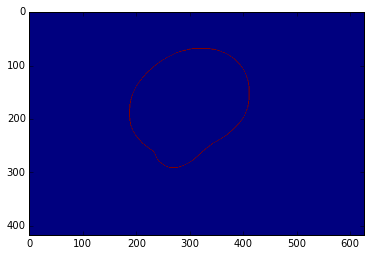

In [85]:
labels = measure.label(edges)
labels = labels==labels.max()
plt.imshow(labels)

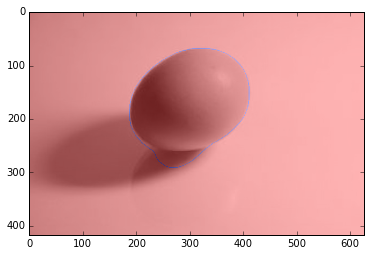

In [86]:
plt.imshow(color.label2rgb(labels, image = egg, ))